# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [5]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [6]:
import numpy as np

def design_matrix(x, m):
    n = len(x)
    #так как первый столбец матрицы A всегда состоит из единиц, начнем создавать матрицу с него
    A = np.ones(n)
    
    #будем заталкивать в A строки из массива x в степени m
    for i in range (m):
        A = np.concatenate((A, [j**(i+1) for j in x]))
    
    #сделаем правильную форму
    A = A.reshape(m+1, n)
    
    return A.T

#normal equations туть:

def finding_beta(x, y, m):
    A = design_matrix(x, m)
    M = A.T @ A
    v = A.T @ y

    b = np.linalg.solve(M, v)
    return b



### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

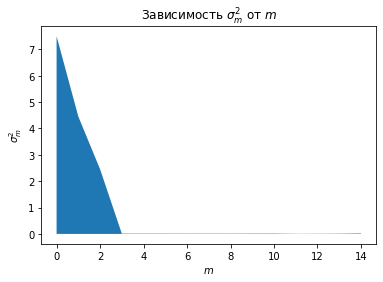

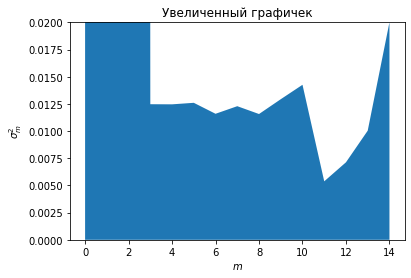

Видим по графику, что стабилизируется на m = 3


In [7]:
import matplotlib.pyplot as plt

def sigma_m_squared(x, y, m):
    A = design_matrix(x, m)
    b = finding_beta(x, y, m)
    n = len(x)
    
    s = 0
    P = A @ b
    
    for i in range(n):
        s += (P[i] - y[i])**2
    
    s = s / (n - m)
    
    return s

n = len(x) 
m = np.arange(n)
sigma = np.zeros(n)

for i in range(n):
    sigma[i] = sigma_m_squared(x, y, i)
    
fig, ax = plt.subplots()
ax.stackplot(m, sigma)
ax.set_title('Зависимость $\sigma_m^2$ от $m$')
ax.set_xlabel('$m$')
ax.set_ylabel('$\sigma_m^2$')


fig1, ax1 = plt.subplots()
ax1.stackplot(m, sigma)
ax1.set_title('Увеличенный графичек')
ax1.set_xlabel('$m$')
ax1.set_ylabel('$\sigma_m^2$')
ax1.set_ylim(ymin = 0, ymax = 0.02)

plt.show()

print('Видим по графику, что стабилизируется на m = 3')

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

По графику можно заключить, что хорошо ложатся все полиномы степени выше 2.


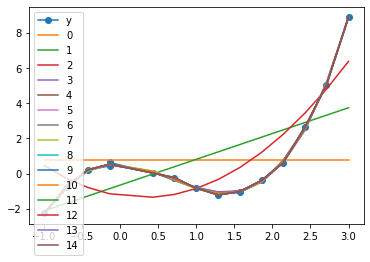

<Figure size 360x720 with 0 Axes>

In [4]:
P = np.zeros((n, n))

for i in range(n):
    A = design_matrix(x, i)
    b = finding_beta(x, y, i)
    v = A @ b
    for j in range(n):
        P[i][j] = v[j]

fig2, ax2 = plt.subplots()
ax2.plot(x, y, label = 'y', marker='o')

for i in range(n):
    ax2.plot(x, P[i, :], label = i)
    
ax2.legend(loc='upper left')

print('По графику можно заключить, что хорошо ложатся все полиномы степени выше 2.')

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [6]:
#Мы решили, что оптимальное значение m = 3

A = design_matrix(x, 3)
Q, R = np.linalg.qr(A)

f = Q.T @ y
beta_qr = np.linalg.solve(R, f)
beta_nee = finding_beta(x, y, 3)

print(beta_qr - beta_nee)
print('Результаты совпадают)')

[-1.88182803e-14 -1.59317004e-14  4.39648318e-14 -1.33226763e-14]
Результаты совпадают)


# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

Text(0.5, 1.0, 'Интерполяционные многочлены и функция')

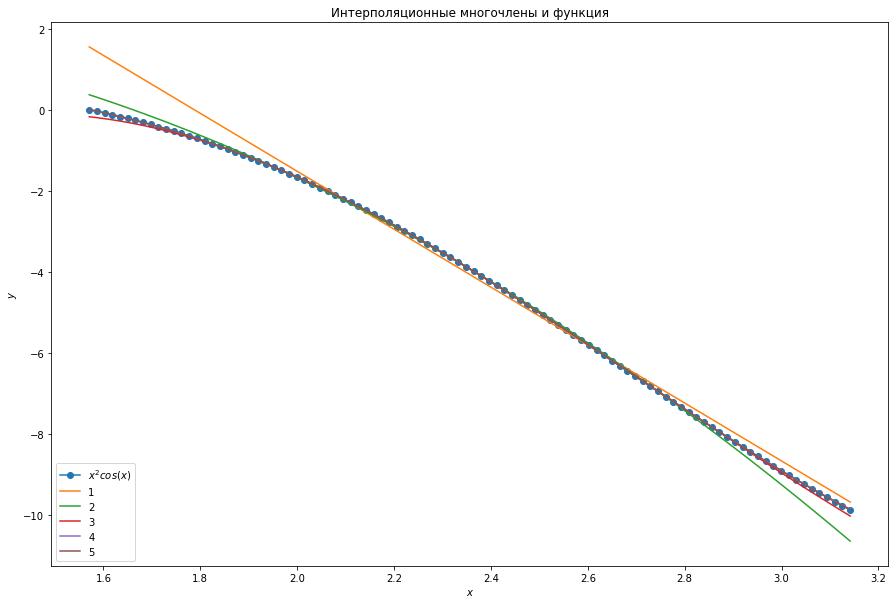

In [17]:
#приготовление узлов функции, которую собираемся интерполировать
def xy(a, b, m):
    l = b - a
    x = [a + l * (i + 1) / (m + 2) for i in range(m + 1)]
    y = [i**2 * np.cos(i) for i in x]
    
    return x, y

def Lagrange (x, y, z):
    n = len(x)
    
    #заготовочка под базисные полиномы
    l = np.ones(n)
    #заготовочка под ответ
    s = 0
    
    for i in range(n):
        
        for j in range(n):
            if i == j:
                continue    
            l[i] *= (z - x[j]) / (x[i] - x[j])
            
        s += l[i]*y[i]
    
    return s

#функции закончились, приступаем к подготовке графика
a = np.pi / 2
b = np.pi
m = 5

z = np.linspace(np.pi / 2, np.pi, 100)
f = [i**2 * np.cos(i) for i in z]

fig3, ax3 = plt.subplots(figsize = (15, 10))
ax3.plot(z, f, label = '$x^{2} cos{(x)}$', marker='o')

for i in range(1,m+1):
    x, y = xy(a, b, i)
    L = [Lagrange(x, y, j) for j in z]
    ax3.plot(z, L, label = i)
    
ax3.legend(loc = 'lower left')
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title('Интерполяционные многочлены и функция')




### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [18]:
#генерация многочленов Чебышева
CN = [0.5*(a + b) + 0.5*(b - a)*np.cos((2*k - 1) / (2*4) * np.pi) for k in range(1,5)]
print(CN)

[3.0818077782272026, 2.656753355134518, 2.0556356252501717, 1.630581202157487]


Видим, что интерполяция по сетке плохо описывает функцию на краях, в отличие от интерполяции по узлам Чебышева


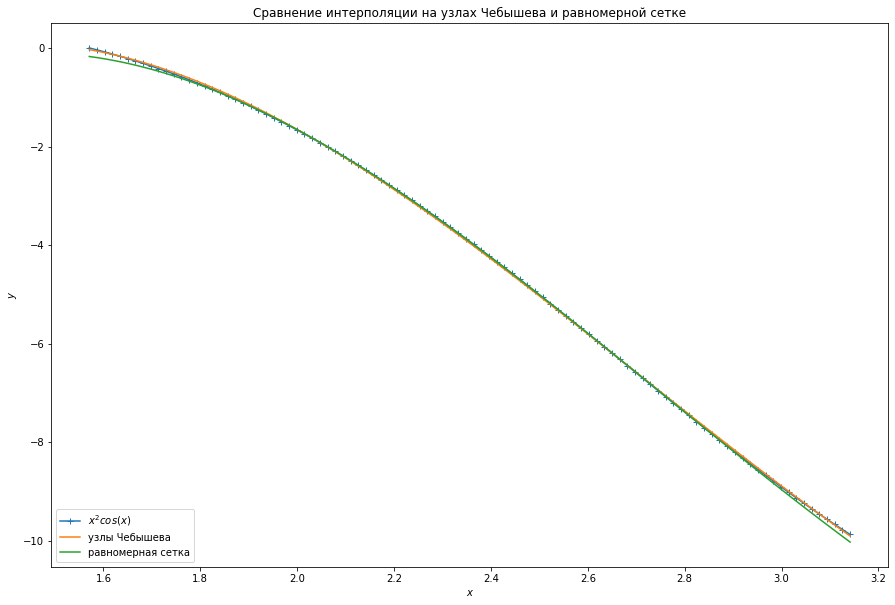

In [21]:
#построим,собственно, интерполяционные полиномы на узлах Чебышева и на равномерной сетке

x_cn = CN
y_cn = [i**2 * np.cos(i) for i in x_cn]

x, y = xy(a, b, 3)

L_cn = [Lagrange(x_cn, y_cn, j) for j in z]
L = [Lagrange(x, y, j) for j in z]

fig4, ax4 = plt.subplots(figsize=(15,10))
ax4.plot(z, f, label = '$x^{2} cos{(x)}$', marker = '+')
ax4.plot(z, L_cn, label = 'узлы Чебышева')
ax4.plot(z, L, label = 'равномерная сетка')

ax4.legend(loc = 'lower left')
ax4.set_xlabel('$x$')
ax4.set_ylabel('$y$')
ax4.set_title('Сравнение интерполяции на узлах Чебышева и равномерной сетке')

print("Видим, что интерполяция на сетке хуже описывает функцию на краях, чем интерполяция на узлах Чебышева")
